# Reading the data

In [2]:
# UPLOADING DATA FILE

from google.colab import files

upload = files.upload()

Saving Potential, Generation, Capacity - Renewable.csv to Potential, Generation, Capacity - Renewable.csv


In [3]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np

In [4]:
df = pd.read_csv('Potential, Generation, Capacity - Renewable.csv')
display(df)

,Rowid,Country,State lgd code,State,Year,Region-wise installation of electricity,"Energy value type ( potential, capacity, generation )",Types of energy sources,Nature of energy sources,"Types of usage (utility ,captive)",Type of energy sector,Values for renewable electricity
0,1,India,1,Jammu And Kashmir,2011,NR,Capacity,SMALL HYDRO,NaN,NaN,NaN,126.501442
1,2,India,1,Jammu And Kashmir,2011,NaN,Generation,BIOMASS-BAGASSE,RENEWABLE,UTILITY,UTILITY-RE,0.000000
2,3,India,1,Jammu And Kashmir,2011,NaN,Generation,COAL,NON-RENEWABLE,CAPTIVE,CAPTIVE,0.000000
3,4,India,1,Jammu And Kashmir,2011,NaN,Generation,DIESEL,NON-RENEWABLE,CAPTIVE,CAPTIVE,3.482140
4,5,India,1,Jammu And Kashmir,2011,NaN,Generation,HYDRO,NON-RENEWABLE,CAPTIVE,CAPTIVE,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
6325,6326,India,38,The Dadra And Nagar Haveli And Daman And Diu,2020,NaN,Generation,SMALL HYDRO,RENEWABLE,UTILITY,UTILITY-RE,0.000000
6326,6327,India,38,The Dadra And Nagar Haveli And Daman And Diu,2020,NaN,Generation,SOLAR,RENEWABLE,CAPTIVE,CAPTIVE,0.000000
6327,6328,India,38,The Dadra And Nagar Haveli And Daman And Diu,2020,NaN,Generation,SOLAR,RENEWABLE,UTILITY,UTILITY-RE,28.017000
6328,6329,India,38,The Dadra And Nagar Haveli And Daman And Diu,2020,NaN,Generation,WIND,RENEWABLE,CAPTIVE,CAPTIVE,0.000000


# Some basic insights into data

In [5]:
df.describe()

,Rowid,State lgd code,Year,Values for renewable electricity
count,6330.000000,6330.000000,6330.000000,6330.000000
mean,3165.500000,18.863033,2015.934123,2870.319082
std,1827.457934,10.693523,2.799779,9598.545617
min,1.000000,1.000000,2011.000000,0.000000
25%,1583.250000,9.000000,2014.000000,0.000000
50%,3165.500000,19.000000,2016.000000,46.991000
75%,4747.750000,28.000000,2018.000000,1104.060000
max,6330.000000,38.000000,2020.000000,142560.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6330 entries, 0 to 6329
Data columns (total 12 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Rowid                                                  6330 non-null   int64  
 1   Country                                                6330 non-null   object 
 2   State lgd code                                         6330 non-null   int64  
 3   State                                                  6330 non-null   object 
 4   Year                                                   6330 non-null   int64  
 5   Region-wise installation of electricity                1577 non-null   object 
 6   Energy value type ( potential, capacity, generation )  6330 non-null   object 
 7   Types of energy sources                                6330 non-null   object 
 8   Nature of energy sources                        

In [7]:
x=df.isna().sum()   #df. isna(). sum() returns the number of missing values in each column.
print(x)

Rowid                                                       0
Country                                                     0
State lgd code                                              0
State                                                       0
Year                                                        0
Region-wise installation of electricity                  4753
Energy value type ( potential, capacity, generation )       0
Types of energy sources                                     0
Nature of energy sources                                  894
Types of usage (utility ,captive)                        1577
Type of energy sector                                    1577
Values for renewable electricity                            0
dtype: int64


So there are some null entries in our data. 

In [8]:
for col in df.columns.values:
  unique_val = pd.unique(df[col])
  print('Column ' + '"'+ col+'"'  + ' has ' + str(len(unique_val)) + ' unique values')

Column "Rowid" has 6330 unique values
Column "Country" has 1 unique values
Column "State lgd code" has 36 unique values
Column "State" has 36 unique values
Column "Year" has 10 unique values
Column "Region-wise installation of electricity" has 6 unique values
Column "Energy value type ( potential, capacity, generation )" has 3 unique values
Column "Types of energy sources" has 15 unique values
Column "Nature of energy sources" has 3 unique values
Column "Types of usage (utility ,captive)" has 3 unique values
Column "Type of energy sector" has 6 unique values
Column "Values for renewable electricity" has 3246 unique values


# Filling the missing values

In [9]:
df['Region-wise installation of electricity'].fillna(0,inplace=True)
df['Nature of energy sources'].fillna("RENEWABLE",inplace=True)
df['Types of usage (utility ,captive)'].fillna("UTILITY",inplace=True)
df['Type of energy sector'].fillna("UTILITY-RE",inplace=True)
for i in range(len(df['Region-wise installation of electricity'])):
  if df['Region-wise installation of electricity'][i]==0 :
      df['Region-wise installation of electricity'][i]=df['Region-wise installation of electricity'][i-1]
display(df)      

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,Rowid,Country,State lgd code,State,Year,Region-wise installation of electricity,"Energy value type ( potential, capacity, generation )",Types of energy sources,Nature of energy sources,"Types of usage (utility ,captive)",Type of energy sector,Values for renewable electricity
0,1,India,1,Jammu And Kashmir,2011,NR,Capacity,SMALL HYDRO,RENEWABLE,UTILITY,UTILITY-RE,126.501442
1,2,India,1,Jammu And Kashmir,2011,NR,Generation,BIOMASS-BAGASSE,RENEWABLE,UTILITY,UTILITY-RE,0.000000
2,3,India,1,Jammu And Kashmir,2011,NR,Generation,COAL,NON-RENEWABLE,CAPTIVE,CAPTIVE,0.000000
3,4,India,1,Jammu And Kashmir,2011,NR,Generation,DIESEL,NON-RENEWABLE,CAPTIVE,CAPTIVE,3.482140
4,5,India,1,Jammu And Kashmir,2011,NR,Generation,HYDRO,NON-RENEWABLE,CAPTIVE,CAPTIVE,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
6325,6326,India,38,The Dadra And Nagar Haveli And Daman And Diu,2020,WR,Generation,SMALL HYDRO,RENEWABLE,UTILITY,UTILITY-RE,0.000000
6326,6327,India,38,The Dadra And Nagar Haveli And Daman And Diu,2020,WR,Generation,SOLAR,RENEWABLE,CAPTIVE,CAPTIVE,0.000000
6327,6328,India,38,The Dadra And Nagar Haveli And Daman And Diu,2020,WR,Generation,SOLAR,RENEWABLE,UTILITY,UTILITY-RE,28.017000
6328,6329,India,38,The Dadra And Nagar Haveli And Daman And Diu,2020,WR,Generation,WIND,RENEWABLE,CAPTIVE,CAPTIVE,0.000000


In [10]:
x=df.isna().sum()   #df. isna(). sum() returns the number of missing values in each column.
print(x)

Rowid                                                    0
Country                                                  0
State lgd code                                           0
State                                                    0
Year                                                     0
Region-wise installation of electricity                  0
Energy value type ( potential, capacity, generation )    0
Types of energy sources                                  0
Nature of energy sources                                 0
Types of usage (utility ,captive)                        0
Type of energy sector                                    0
Values for renewable electricity                         0
dtype: int64


# Statewise analysis

In [ ]:
states=df['State'].unique()
print(states)

In [ ]:
df2 = df.groupby('State').apply(lambda x: x['Values for renewable electricity'].unique().sum())
print(df2)

State
Andaman And Nicobar Islands                     2.996858e+03
Andhra Pradesh                                  1.038894e+06
Arunachal Pradesh                               2.625466e+04
Assam                                           8.112056e+04
Bihar                                           2.397836e+05
Chandigarh                                      2.071600e+02
Chhattisgarh                                    1.099485e+06
Delhi                                           8.479852e+04
Goa                                             3.893262e+03
Gujarat                                         1.579660e+06
Haryana                                         2.663410e+05
Himachal Pradesh                                4.084950e+05
Jammu And Kashmir                               2.669299e+05
Jharkhand                                       3.000221e+05
Karnataka                                       9.805046e+05
Kerala                                          9.977509e+04
Ladakh            

In [ ]:
df1=df2.sort_values()
print(df1)

State
Lakshadweep                                     4.908400e+01
Chandigarh                                      2.071600e+02
The Dadra And Nagar Haveli And Daman And Diu    2.616330e+02
Ladakh                                          1.111922e+03
Andaman And Nicobar Islands                     2.996858e+03
Goa                                             3.893262e+03
Puducherry                                      5.045842e+03
Mizoram                                         1.005264e+04
Nagaland                                        1.060793e+04
Manipur                                         1.675011e+04
Meghalaya                                       1.681253e+04
Arunachal Pradesh                               2.625466e+04
Tripura                                         4.271248e+04
Sikkim                                          5.716014e+04
Assam                                           8.112056e+04
Delhi                                           8.479852e+04
Kerala            

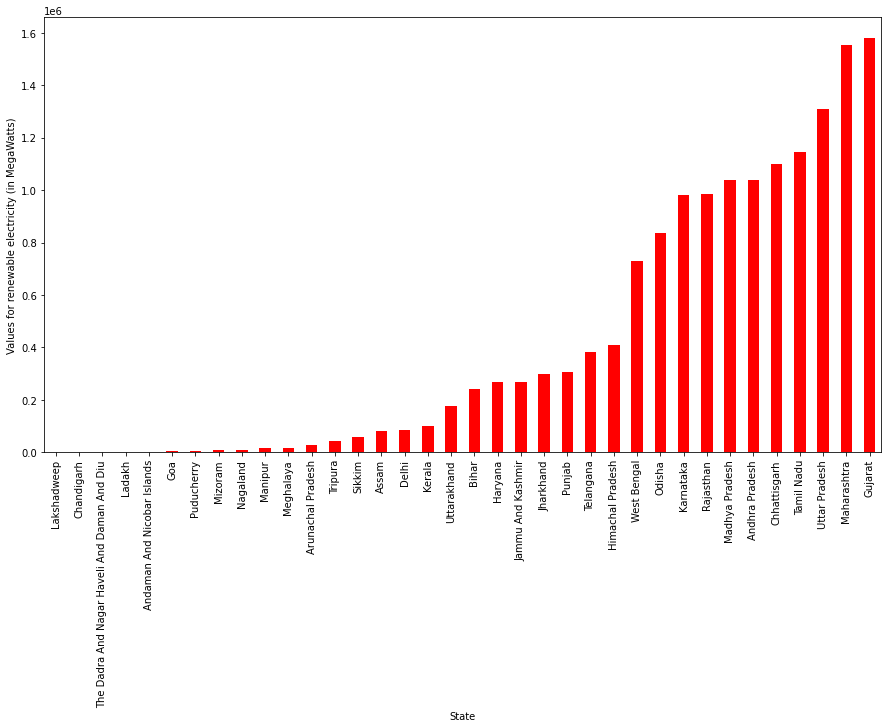

In [ ]:
df1.plot(kind='bar', y='Values for renewable electricity',figsize=(15,8),ylabel='Values for renewable electricity (in MegaWatts)',color='red')

# Energy source wise analysis

In [18]:
dfe = df.groupby('Types of energy sources').apply(lambda x: x['Values for renewable electricity'].unique().sum()).sort_values()
print(dfe)

Types of energy sources
NAPHTHA                      80.200
RENEWABLES                 1362.783
WASTE                      3204.092
BIOMASS                   37297.300
LIGNITE                   47877.180
COGENERATION-BAGASSE      61293.450
DIESEL                    79670.450
BIOMASS-BAGASSE          121198.656
SMALL HYDRO              137593.594
NUCLEAR                  359709.050
NATURAL GAS              780060.629
SOLAR                   1014249.193
HYDRO                   1284202.242
WIND                    1655188.458
COAL                    9514985.434
dtype: float64


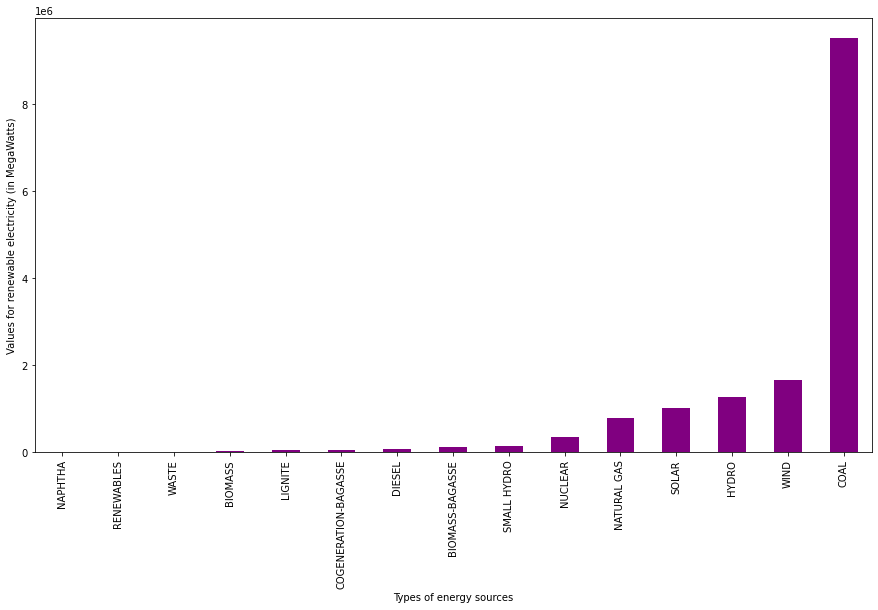

In [19]:
dfe.plot(kind='bar', y='Values for renewable electricity',figsize=(15,8),ylabel='Values for renewable electricity (in MegaWatts)',color='purple')

# Yearwise Analysis

In [16]:
dfy = df.groupby('Year').apply(lambda x: x['Values for renewable electricity'].unique().sum())
print(dfy)

Year
2011     979323.102
2012     936552.310
2013    1126249.886
2014    1194642.695
2015    2091337.856
2016    1693230.463
2017    2253870.357
2018    2230840.195
2019    2450917.483
2020    3194859.435
dtype: float64


Text(0, 0.5, 'Coal reserved quantity (in million tonnes)')

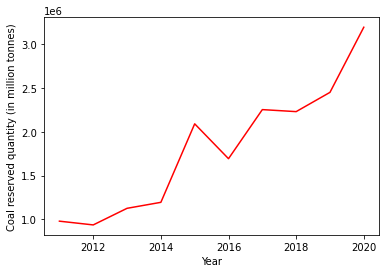

In [17]:
plt.plot(dfy,'red')
plt.xlabel("Year")
plt.ylabel("Coal reserved quantity (in million tonnes)")

# Analysis using Pie charts

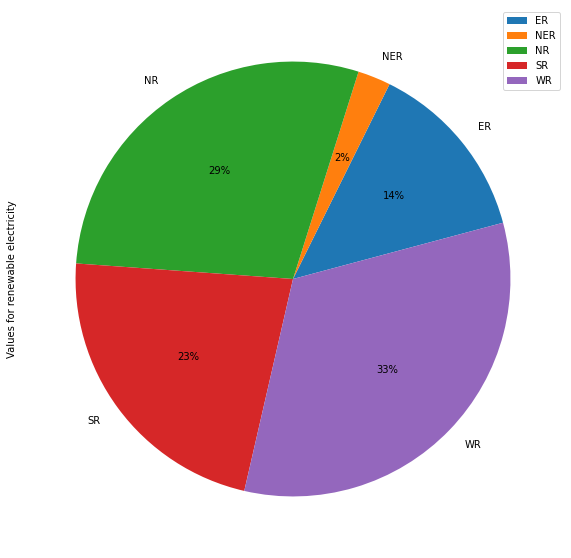

In [20]:
df.groupby(['Region-wise installation of electricity']).sum().plot(kind='pie', y='Values for renewable electricity',autopct='%1.0f%%',figsize=(10,10),xlabel="Region ",startangle=15)

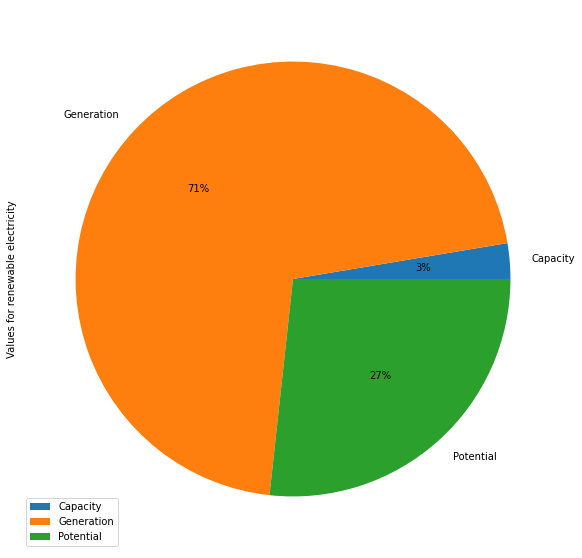

In [21]:
df.groupby(['Energy value type ( potential, capacity, generation )']).sum().plot(kind='pie', y='Values for renewable electricity',autopct='%1.0f%%',figsize=(10,10),xlabel="energy value type ")

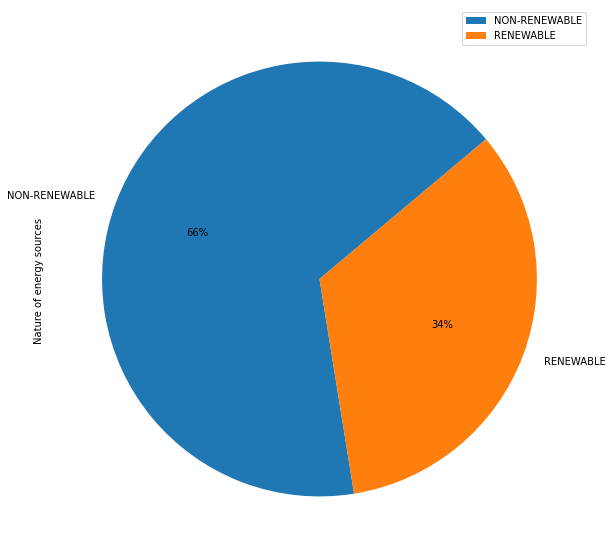

In [22]:
df.groupby(['Nature of energy sources']).sum().plot(kind='pie', y='Values for renewable electricity',autopct='%1.0f%%',figsize=(10,10),ylabel="Nature of energy sources ",startangle=40)

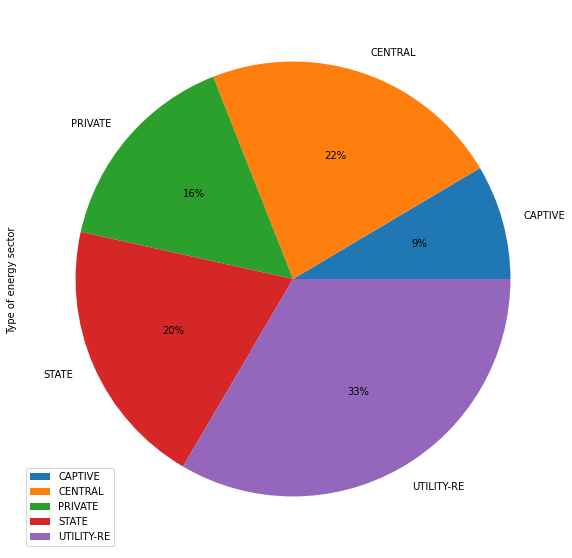

In [25]:
df.groupby(['Type of energy sector']).sum().plot(kind='pie', y='Values for renewable electricity',autopct='%1.0f%%',figsize=(10,10),ylabel="Type of energy sector ",startangle=0)

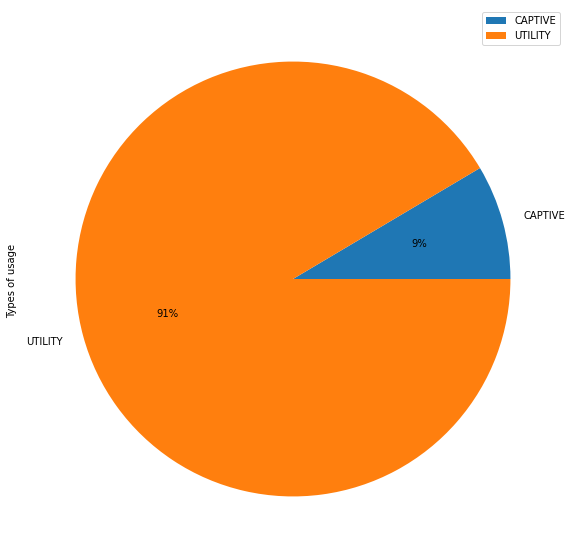

In [26]:
df.groupby(['Types of usage (utility ,captive)']).sum().plot(kind='pie', y='Values for renewable electricity',autopct='%1.0f%%',figsize=(10,10),ylabel="Types of usage ",startangle=0)